In [2]:
!pip install kaggle

In [3]:
# Step 1: Upload Kaggle API key
from google.colab import files
files.upload()  # upload kaggle.json here

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"samikhanniazi","key":"fcd8bed4867e6c5c8d427f275cedf018"}'}

In [4]:
# Rename "kaggle (1).json" → "kaggle.json"
!mv "/content/kaggle (1).json" /content/kaggle.json

# Make .kaggle folder
!mkdir -p ~/.kaggle

# Copy kaggle.json to the right place
!cp /content/kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json

## Import Face Mask Dataset

In [5]:
# API to fetch the Dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 72% 118M/163M [00:00<00:00, 1.22GB/s]
100% 163M/163M [00:00<00:00, 1.08GB/s]


In [6]:
# Extracting the Compressed Dataset
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is Extracted")

The dataset is Extracted


In [7]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [8]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [9]:
with_mask_image = os.listdir('/content/data/with_mask')
print(with_mask_image[0:5])
print(with_mask_image[-5:])

['with_mask_2603.jpg', 'with_mask_868.jpg', 'with_mask_246.jpg', 'with_mask_2309.jpg', 'with_mask_1316.jpg']
['with_mask_3620.jpg', 'with_mask_3279.jpg', 'with_mask_1361.jpg', 'with_mask_2957.jpg', 'with_mask_3296.jpg']


In [10]:
without_mask_image = os.listdir('/content/data/without_mask')
print(without_mask_image[0:5])
print(without_mask_image[-5:])

['without_mask_732.jpg', 'without_mask_3207.jpg', 'without_mask_601.jpg', 'without_mask_2730.jpg', 'without_mask_2737.jpg']
['without_mask_1377.jpg', 'without_mask_885.jpg', 'without_mask_1933.jpg', 'without_mask_2364.jpg', 'without_mask_949.jpg']


In [11]:
print("Number of Images with Mask : ",len(with_mask_image))
print("Number of Images Without Mask : ",len(without_mask_image))

Number of Images with Mask :  3725
Number of Images Without Mask :  3828


# Creating Label For two class of Images

### With Mask --> 1
### Without Mask --> 0

In [12]:
with_mask_image = [1] * 3725
without_mask_image = [0] * 3828

In [13]:
print(with_mask_image[0:5])
print(without_mask_image[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print("Number of Images With Mask : ",len(with_mask_image))
print("Numer of images Without Mask : ",len(without_mask_image))

Number of Images With Mask :  3725
Numer of images Without Mask :  3828


In [15]:
labels = with_mask_image + without_mask_image

In [16]:
print("Number of image in Label : ",len(labels))
print(labels[0:5])
print(labels[-5:])

Number of image in Label :  7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Display With Mask Image

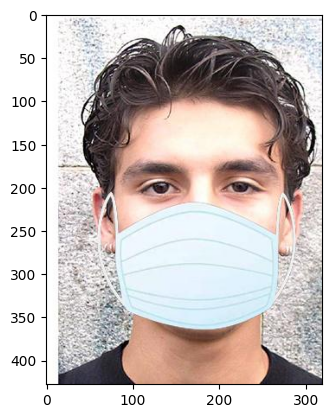

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_1462.jpg')
imgplot = plt.imshow(img)
plt.show()

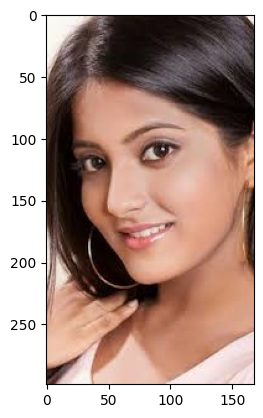

In [18]:
img = mpimg.imread('/content/data/without_mask/without_mask_1989.jpg')
implot = plt.imshow(img)
plt.show()

# Image Processing
### Resize the Image
### Convert the Image to Numpy Array

In [19]:
import numpy as np

with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

data = []


# With Mask Images
with_mask_images = os.listdir(with_mask_path)

for img_file in with_mask_images:
    image_path = os.path.join(with_mask_path, img_file)
    image = Image.open(image_path)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Without Mask Images
without_mask_images = os.listdir(without_mask_path)

for img_file in without_mask_images:
    image_path = os.path.join(without_mask_path, img_file)
    image = Image.open(image_path)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

In [22]:
data

[array([[[254, 226, 187],
         [251, 223, 184],
         [253, 226, 188],
         ...,
         [ 45,  52,  44],
         [ 45,  52,  42],
         [ 43,  51,  38]],
 
        [[254, 222, 182],
         [250, 219, 180],
         [252, 223, 183],
         ...,
         [ 42,  50,  42],
         [ 43,  52,  42],
         [ 43,  52,  39]],
 
        [[251, 216, 174],
         [247, 213, 172],
         [249, 217, 176],
         ...,
         [ 37,  47,  38],
         [ 41,  51,  40],
         [ 41,  52,  38]],
 
        ...,
 
        [[ 97,  97, 107],
         [ 98,  98, 108],
         [ 99,  99, 109],
         ...,
         [ 77,  84,  78],
         [ 86,  94,  92],
         [107, 117, 118]],
 
        [[ 99,  99, 110],
         [100, 100, 111],
         [100, 100, 111],
         ...,
         [ 76,  82,  77],
         [ 83,  91,  89],
         [ 90, 100, 101]],
 
        [[ 99,  99, 111],
         [100, 100, 112],
         [101, 101, 113],
         ...,
         [ 76,  82,  77],
  

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

### Converting data and Labels list to numpy array

In [51]:
X = np.array(data)
Y = np.array(labels)

In [52]:
type(X)

numpy.ndarray

In [53]:
type(Y)

numpy.ndarray

In [54]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [55]:
print(Y)

[1 1 1 ... 0 0 0]


## Train Test Split

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


## Scaling the data

In [58]:
x_train_scale = X_train/255
y_train_scale = Y_train/255

In [59]:
x_train_scale[0]

array([[[0.61960784, 0.59215686, 0.56862745],
        [0.62352941, 0.59607843, 0.57254902],
        [0.63137255, 0.60392157, 0.58039216],
        ...,
        [0.81568627, 0.78431373, 0.74117647],
        [0.81960784, 0.78823529, 0.74509804],
        [0.81960784, 0.78823529, 0.74509804]],

       [[0.61960784, 0.59215686, 0.56862745],
        [0.62745098, 0.6       , 0.57647059],
        [0.63137255, 0.60392157, 0.58039216],
        ...,
        [0.81568627, 0.78431373, 0.74117647],
        [0.81960784, 0.78823529, 0.74509804],
        [0.81960784, 0.78823529, 0.74509804]],

       [[0.62352941, 0.59607843, 0.57254902],
        [0.62745098, 0.6       , 0.57647059],
        [0.63529412, 0.60784314, 0.58431373],
        ...,
        [0.81568627, 0.78039216, 0.74509804],
        [0.81960784, 0.78431373, 0.74901961],
        [0.81960784, 0.78431373, 0.74901961]],

       ...,

       [[0.56078431, 0.52941176, 0.52156863],
        [0.56078431, 0.53333333, 0.5254902 ],
        [0.56078431, 0

Building A Convolutional Neural Network CNN

In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
num_of_classes = 2

model = tf.keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
# Compile the Neural Network
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [63]:
print(len(x_train_scale), len(Y_train))

6042 6042


In [64]:
min_len = min(len(x_train_scale), len(Y_train))
x_train_scale = x_train_scale[:min_len]
Y_train = Y_train[:min_len]

In [65]:
# Train the Neural Network
history = model.fit(x_train_scale, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 122s 705ms/step - acc: 0.6585 - loss: 0.7003 - val_acc: 0.8694 - val_loss: 0.3131
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 701ms/step - acc: 0.8661 - loss: 0.3425 - val_acc: 0.8959 - val_loss: 0.2711
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 692ms/step - acc: 0.8954 - loss: 0.2729 - val_acc: 0.9207 - val_loss: 0.2390
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 118s 695ms/step - acc: 0.8986 - loss: 0.2648 - val_acc: 0.9041 - val_loss: 0.2792
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 116s 680ms/step - acc: 0.9114 - loss: 0.2176 - val_acc: 0.9107 - val_loss: 0.2411


## model Evaluation

In [67]:
loss, accuracy = model.evaluate(X_test, Y_test)


48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - acc: 0.8962 - loss: 35.8724


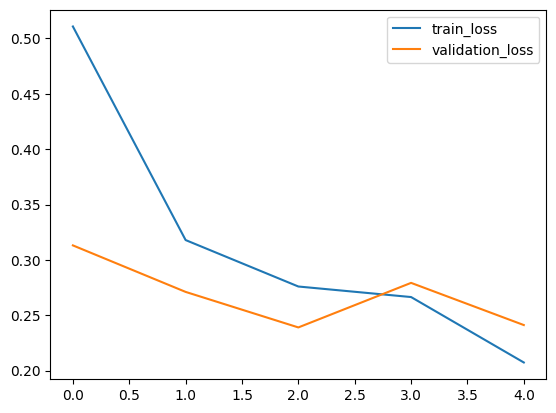

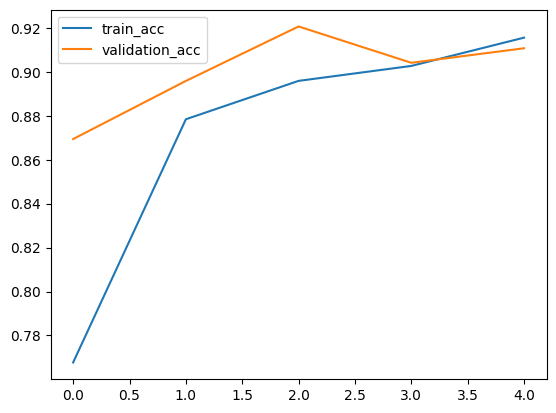

In [72]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='validation_loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['acc'], label='train_acc')
plt.plot(h.history['val_acc'], label='validation_acc')
plt.legend()
plt.show()


## Predictive System

Enter the path of the Image Predicted/content/without mask image.png


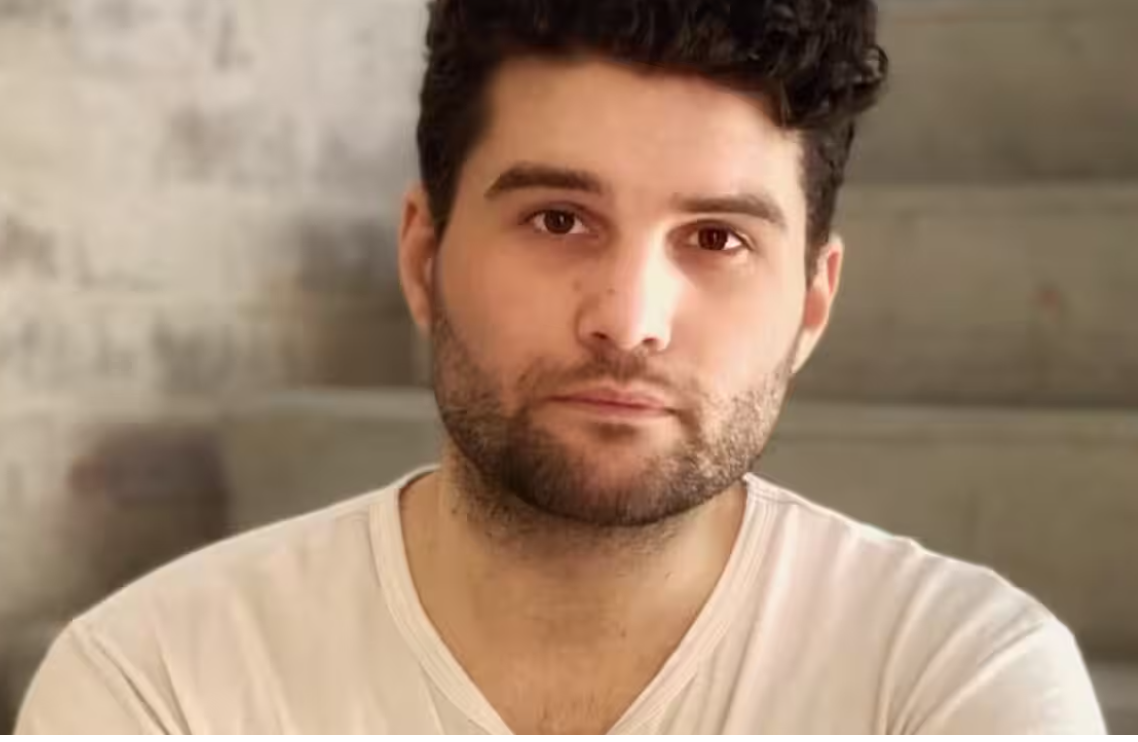

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[0. 1.]]
1
The Person in the image is wearing a Mask


In [76]:
input_image_path = input("Enter the path of the Image Predicted")
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(128,128))
input_image_reshaped = np.reshape(input_image_resize,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print("The Person in the image is wearing a Mask")
else:
  print("The person in the image is not wearing a Mask")
